<p><center><font size="6"><b>Ajuste de parametros del modelo de Monod</b></font></center></p>
<center><font size="2"  color="blue"><i><b>Dr. Kelvyn Baruc Sánchez Sánchez</b></i></font></center>
<center><font size="2"  color="blue"><i><b>M.C. Liliana Soledad Nativitas Sandoval</b></i></font></center>
<center><font size="2"  color="black"><i><b>Instituto Tecnológico de Orizaba</b></i></font></center>

<hr>

<p><center><font size="3"><i>Ecuación de Monod para el crecimiento bacteriano</i></font></center></p>
<p><center><font size="4">$\mu=\mu_{max}\frac{S}{K_s+S}$</font></center></p>

Interact.Slider{Float64}(1: "input" = 0.23 Float64 , L"$\mu_{max}$", 0.23, 0.0:0.01:1.0, "horizontal", true, ".3f", true)

Interact.Slider{Float64}(3: "input-2" = 0.19 Float64 , L"$K_s$", 0.19, 0.0:0.01:1.0, "horizontal", true, ".3f", true)


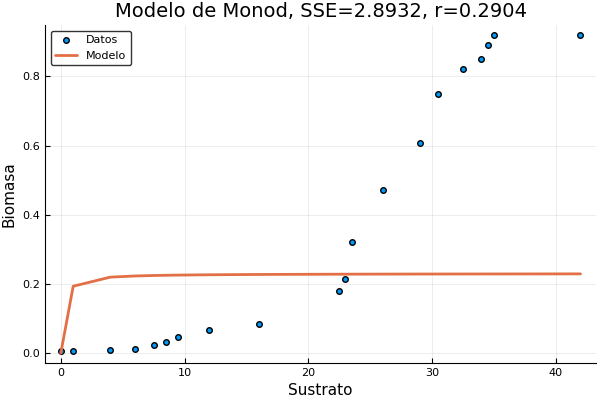

In [1]:
# Carga de paquetes a emplear 
using Reactive, Interact
using LaTeXStrings
using Plots
pyplot()

# Datos experimentales
datos=[0 0.475 0.005
       1 0.475 0.006
       4 0.475 0.009
       6 0.468 0.012
       7.5 0.453 0.022
       8.5 0.445 0.031
       9.5 0.440 0.047
       12 0.429 0.068
       16 0.400 0.085
       22.5 0.365 0.180
       23 0.355 0.214
       23.5 0.320 0.320
       26 0.300 0.470
       29 0.285 0.608
       30.5 0.231 0.750
       32.5 0.166 0.820
       34 0.140 0.850
       34.5 0.135 0.890
       35 0.130 0.920
       42 0.130 0.920]

# Definición de barras deslizadoras interactivas
μmax_s = slider(0.0:0.01:1.0, value=0.23, label=L"\mu_{max}")
Ks_s = slider(0.0:0.01:1.0, value=0.19, label=L"K_s")
yAjuste = zeros(length(datos[:,1]))

# Ciclo interactivo
@manipulate for μmax = μmax_s, Ks = Ks_s
    i = 1
    for j in datos[:,2]
        # Definición del modelo matemático
        yAjuste[i] = μmax*(datos[i,1]/(Ks + datos[i,1]))
        i += 1
    end
    
    # SSE
    SSE = sum((yAjuste - datos[:,3]).^2)
   
    # Gráfica de comparación entre datos experimentales y modelo
    pl =scatter(datos[:,1], datos[:,3], label="Datos")
    msg = @sprintf("Modelo de Monod, SSE=%4.4f, r=%4.4f", SSE, cor(yAjuste,datos[:,3]))
    plot!(datos[:,1], yAjuste, label="Modelo", lw=2, xlabel="Sustrato", ylabel = "Biomasa", title=msg)
end

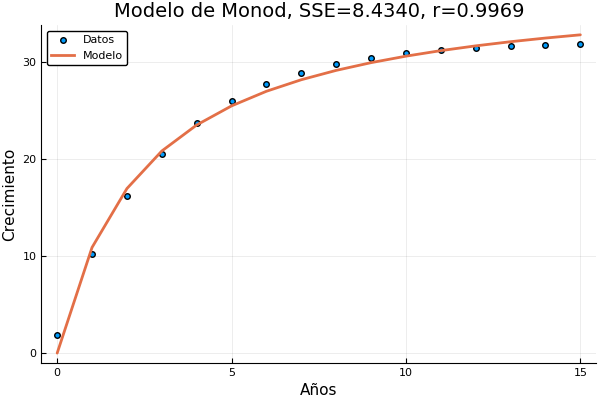

L"$\mu_{max} = $"

L"$L_{s} = $"

38.2863
2.5175
SSE = 8.4340
r = 0.9969

In [1]:
# Carga de paquetes a emplear 
using LaTeXStrings
using Plots
using LsqFit
pyplot()

# Datos experimentales
datos=[0 1.89
    1 10.16
    2 16.17
    3 20.53
    4 23.70
    5 26
    6 27.67
    7 28.88
    8 29.76
    9 30.40
    10 30.87
    11 31.20
    12 31.45
    13 31.63
    14 31.76
    15 31.85]

# Definición del modelo matemático
model(t, p) = p[1]*(t./(p[2]+t))

# Vector de valores iniciales
p0 = [31.0, 10.0]

# Uso de la funcion curve_fit para ajustar el modelo a los datos experimentales
fit = curve_fit(model, datos[:,1], datos[:,2], p0)
# fit is a composite type (LsqFitResult), with some interesting values:
#	fit.dof: degrees of freedom
#	fit.param: best fit parameters
#	fit.resid: residuals = vector of residuals
#	fit.jacobian: estimated Jacobian at solution

# Obtención de datos calculados
yAjuste = model(datos[:,1], fit.param)

# Gráfica de comparación entre datos experimentales y modelo
pl = scatter(datos[:,1], datos[:,2], label="Datos")
msg = @sprintf("Modelo de Monod, SSE=%4.4f, r=%4.4f", sum(fit.resid.^2),cor(yAjuste,datos[:,2]))
plot!(datos[:,1], yAjuste, label="Modelo", lw=2, xlabel="Años", ylabel = "Crecimiento", title=msg)
display(pl)

# Impresión de resultados númericos
display(L"\mu_{max} = ")
print_with_color(:bold,@sprintf("%4.4f\n",fit.param[1]))
display(L"L_{s} = ")
print_with_color(:bold,@sprintf("%4.4f\n",fit.param[2]))
print_with_color(:bold,@sprintf("SSE = %4.4f\n",sum(fit.resid.^2)))
print_with_color(:bold,@sprintf("r = %4.4f",cor(yAjuste,datos[:,2])))